In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2

In [2]:
dataset=pd.read_csv('dataset.csv')
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


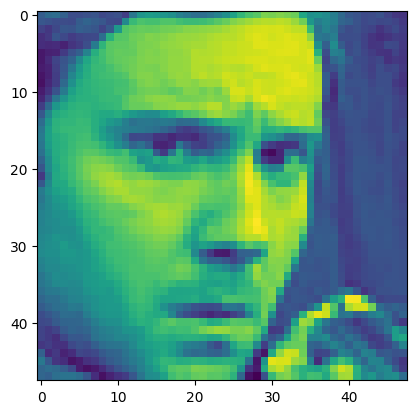

In [3]:
arr=np.array(dataset.iloc[0]['pixels'].split(" ")).reshape(48,48).astype('float')
plt.imshow(arr)

In [4]:
img_arr=dataset['pixels'].apply(lambda x:np.array(x.split(" ")).reshape(48,48,1).astype('float32'))

In [5]:
img_arr=np.stack(img_arr,axis=0)

In [6]:
labels=dataset['emotion'].values
labels

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(img_arr,labels,test_size=0.2)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
basemodel=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [10]:
basemodel.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
import os
try:
    os.mkdir('checkpoint')
except:
    pass
    


In [12]:
filename="best_model"
checkpoint_path=os.path.join('checkpoint',filename)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [16]:
basemodel.fit(x_train,y_train,epochs=20,validation_split=0.2,callbacks=call_back)

Epoch 1/20
718/718 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.9545
Epoch 1: val_accuracy did not improve from 0.54267
718/718 [==============================] - 47s 65ms/step - loss: 0.1441 - accuracy: 0.9545 - val_loss: 2.7129 - val_accuracy: 0.5312
Epoch 2/20
717/718 [============================>.] - ETA: 0s - loss: 0.1269 - accuracy: 0.9603
Epoch 2: val_accuracy did not improve from 0.54267
718/718 [==============================] - 54s 75ms/step - loss: 0.1268 - accuracy: 0.9603 - val_loss: 2.7300 - val_accuracy: 0.5214
Epoch 3/20
718/718 [==============================] - ETA: 0s - loss: 0.1151 - accuracy: 0.9640
Epoch 3: val_accuracy did not improve from 0.54267
718/718 [==============================] - 55s 76ms/step - loss: 0.1151 - accuracy: 0.9640 - val_loss: 3.0702 - val_accuracy: 0.5045
Epoch 4/20
717/718 [============================>.] - ETA: 0s - loss: 0.1064 - accuracy: 0.9669
Epoch 4: val_accuracy did not improve from 0.54267
718/718 [====

In [3]:
filename="best_model"
checkpoint_path=os.path.join('checkpoint',filename)
model=tf.keras.models.load_model(checkpoint_path)

In [12]:
import cv2
import numpy as np

def preprocess_image(imagepath):
    image = cv2.imread(imagepath)
    
    resized_frame = cv2.resize(image, (48, 48))
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    
    input_image = np.reshape(gray_frame, (48, 48, 1))

    return input_image

imagepath = "C:\\Users\\Ronit Ahuja\\OneDrive\\Documents\\vs code practice\\learn cnn\\angery1.jpg"
image = preprocess_image(imagepath=imagepath)
prediction = model.predict(np.expand_dims(image, axis=0))
print(prediction)


1/1 [==============================] - 0s 38ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
